<a href="https://colab.research.google.com/github/Vladislavjk/ML-Pet-Projects/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cравнение различных алгоритмов NLP

In [ ]:
! pip install catboost

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from catboost import CatBoostClassifier
from wordcloud import WordCloud
from gensim.models import Word2Vec

In [ ]:
! ls 'drive/MyDrive/data for colab'

 flight_delays_test.csv   'Tabular Playground Series'
 flight_delays_train.csv   tabular-playground-series-feb-2022
'language detection'	  'Tabular Playground Series - Jan 2022'
 nlp-getting-started


# Предобработка и визуализация данных

In [ ]:
df = pd.read_csv('drive/MyDrive/data for colab/language detection/Language Detection.csv')

In [ ]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
df.drop_duplicates(subset ='Text',
                     keep = False, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10215 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10215 non-null  object
 1   Language  10215 non-null  object
dtypes: object(2)
memory usage: 239.4+ KB


In [ ]:
df.Language.value_counts(normalize=True)

English       0.134998
French        0.097993
Spanish       0.079589
Portugeese    0.071757
Italian       0.067646
Russian       0.067058
Sweedish      0.065590
Malayalam     0.057660
Dutch         0.052668
Arabic        0.051787
Turkish       0.045913
German        0.045130
Tamil         0.045032
Danish        0.041116
Kannada       0.035634
Greek         0.034459
Hindi         0.005972
Name: Language, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


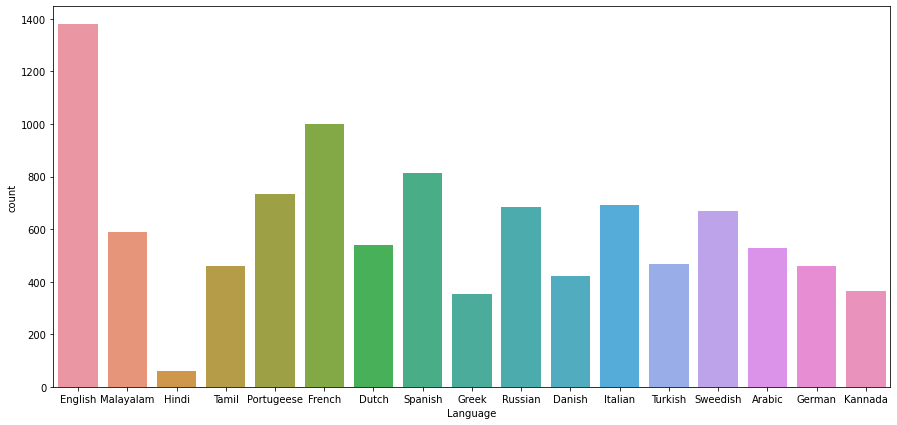

In [ ]:
plt.figure(figsize = (15, 7))
sns.countplot(df.Language);

In [ ]:
class_names = [
	'English',
	'Malayalam',
	'Hindi',
	'Tamil',
	'Portugeese',
	'French',
	'Dutch',
	'Spanish',
	'Greek',
	'Russian',
  'Danish',
  'Italian',
  'Turkish',
  'Sweedish',
  'Arabic',
  'German',
  'Kannada']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.Text, df.Language.apply(lambda x : class_names.index(x)), test_size=0.3, random_state=17)

In [ ]:
X = pd.concat([X_train, X_test])

# Обучение модели

# Bag of words

In [ ]:
cv = CountVectorizer()

In [ ]:
X_cv = cv.fit_transform(X)

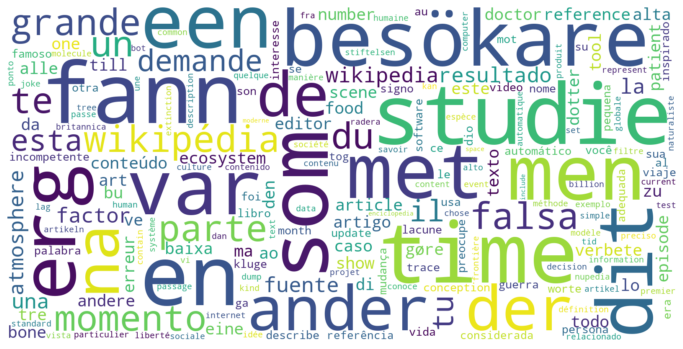

In [ ]:
plt.figure(figsize=(12,10))
plt.axis("off")

pos_wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(' '.join(cv.vocabulary_.keys()))
plt.imshow(pos_wordcloud, interpolation="bilinear");

In [ ]:
X_cv.shape

(10215, 39904)

In [ ]:
X_train_cv, X_test_cv = X_cv[:X_train.shape[0]], X_cv[X_train.shape[0]:]

In [ ]:
X_train_cv.shape

(7150, 39904)

In [ ]:
X_test_cv.shape

(3065, 39904)

In [ ]:
model_cv = CatBoostClassifier(random_state=17, verbose=100)

In [ ]:
model_cv.fit(X_train_cv, y_train)

Learning rate set to 0.087477
0:	learn: 2.6042690	total: 1.22s	remaining: 20m 19s
100:	learn: 0.9938650	total: 2m 23s	remaining: 21m 16s
200:	learn: 0.7572369	total: 4m 20s	remaining: 17m 15s
300:	learn: 0.6753796	total: 6m 17s	remaining: 14m 36s
400:	learn: 0.6297756	total: 8m 13s	remaining: 12m 16s
500:	learn: 0.6018228	total: 10m 8s	remaining: 10m 5s
600:	learn: 0.5798299	total: 12m 4s	remaining: 8m
700:	learn: 0.5638400	total: 13m 59s	remaining: 5m 58s
800:	learn: 0.5506795	total: 15m 55s	remaining: 3m 57s
900:	learn: 0.5394472	total: 17m 51s	remaining: 1m 57s
999:	learn: 0.5295452	total: 19m 45s	remaining: 0us


In [ ]:
roc_auc_score(y_test, model_cv.predict_proba(X_test_cv), multi_class='ovr')

0.9950438681999574

# Tf-Idf

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X_tfidf = tfidf.fit_transform(X)

In [ ]:
X_tfidf.shape

(10215, 39904)

In [ ]:
X_train_tfidf, X_test_tfidf = X_tfidf[:X_train.shape[0]], X_tfidf[X_train.shape[0]:]

In [ ]:
X_train_tfidf.shape

(7150, 39904)

In [ ]:
X_test_tfidf.shape

(3065, 39904)

In [ ]:
model_tfidf = CatBoostClassifier(random_state=17, verbose=100)

In [ ]:
model_tfidf.fit(X_train_tfidf, y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.087477
0:	learn: 2.6066466	total: 2.13s	remaining: 35m 29s
100:	learn: 1.0002686	total: 3m 43s	remaining: 33m 6s
200:	learn: 0.7751382	total: 7m 12s	remaining: 28m 40s
300:	learn: 0.6925722	total: 10m 41s	remaining: 24m 50s
400:	learn: 0.6433350	total: 14m 13s	remaining: 21m 14s
500:	learn: 0.6079122	total: 17m 44s	remaining: 17m 39s
600:	learn: 0.5820836	total: 21m 15s	remaining: 14m 6s
700:	learn: 0.5613369	total: 24m 46s	remaining: 10m 34s
800:	learn: 0.5439297	total: 28m 17s	remaining: 7m 1s
900:	learn: 0.5291903	total: 31m 46s	remaining: 3m 29s
999:	learn: 0.5154393	total: 35m 13s	remaining: 0us


In [ ]:
roc_auc_score(y_test, model_tfidf.predict_proba(X_test_cv), multi_class='ovr')

0.9961924328126212

# Catboost text features

In [ ]:
text_features = ['Text']

In [ ]:
model = CatBoostClassifier(random_state=17, verbose=100, text_features=text_features)

In [ ]:
model.fit(pd.DataFrame(X_train), y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.087477
0:	learn: 2.3076434	total: 4.82s	remaining: 1h 20m 17s
100:	learn: 0.1872148	total: 6m 27s	remaining: 57m 32s
200:	learn: 0.1368315	total: 13m 2s	remaining: 51m 50s
300:	learn: 0.1141770	total: 19m 21s	remaining: 44m 58s
400:	learn: 0.0992197	total: 25m 42s	remaining: 38m 23s
500:	learn: 0.0871643	total: 32m 2s	remaining: 31m 54s
600:	learn: 0.0770131	total: 38m 23s	remaining: 25m 28s
700:	learn: 0.0672719	total: 44m 41s	remaining: 19m 3s
800:	learn: 0.0592846	total: 51m 1s	remaining: 12m 40s
900:	learn: 0.0523982	total: 57m 21s	remaining: 6m 18s
999:	learn: 0.0467008	total: 1h 3m 37s	remaining: 0us


In [ ]:
roc_auc_score(y_test, model.predict_proba(pd.DataFrame(X_test)), multi_class='ovr')

0.9976596692580701